In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.models import Sequential
from keras.layers.core import Dense

In [2]:
link = 'https://raw.githubusercontent.com/OrlandoBelli/OBH/master/time%20series.txt'

In [3]:
df = pd.read_csv(link)
df = pd.read_csv(link, sep = ',', parse_dates = [0], header = None, index_col = 0, names = ['fecha','unidades'])

In [4]:
melt = df.copy()

In [5]:
# ------------------------------------
# ESCALAMIENTO DE LA TABLA MELT
# ------------------------------------

escalar = MinMaxScaler()

melt = pd.DataFrame(escalar.fit_transform(melt))
print(melt)

melt.columns = ['unidades']

print(melt)
# ------------------------------------
# GENERAMOS PREDICTORES
# ------------------------------------

valoresFuturos = ['vf','vf2','vf3','vf4','vf5','vf6','vf7']

for i in range(0,len(valoresFuturos)):
  melt[valoresFuturos[i]] = melt['unidades'].shift(-(i+1))

#ELIMINAR VALORES PERDIDOS PORQUE NO UTILIZARÉ
melt = melt.dropna()
print(melt)
# ------------------------------------
# PARTICIÓN DE LA DATA DE ENTRENAMIENTO CON DATA PARA VALIDAR
# ------------------------------------

# ELIJO LOS ULTIMOS 30 DIAS PARA VALIDAR
sp = len(melt) - 30
sp

dataDeEntrenamiento = melt.iloc[:sp,:]
dataValida = melt.iloc[sp:,:].dropna()

caracteristicas = melt.columns[:-1]
objetivo = melt.columns[-1]

# ------------------------------------
# MATRIZ DE CARACTERISTICAS EN CADA CONJUNTO DE DATOS
# ------------------------------------

x = melt[caracteristicas]

x_train = dataDeEntrenamiento[caracteristicas]
y_train = dataDeEntrenamiento[objetivo].values.reshape(-1,1)

x_test = dataValida[caracteristicas]
y_test = dataValida[objetivo].values.reshape(-1,1)

            0
0    0.342593
1    0.344444
2    0.442593
3    0.314815
4    0.142593
..        ...
599  0.416667
600  0.312963
601  0.244444
602  0.370370
603  0.255556

[604 rows x 1 columns]
     unidades
0    0.342593
1    0.344444
2    0.442593
3    0.314815
4    0.142593
..        ...
599  0.416667
600  0.312963
601  0.244444
602  0.370370
603  0.255556

[604 rows x 1 columns]
     unidades        vf       vf2       vf3       vf4       vf5       vf6  \
0    0.342593  0.344444  0.442593  0.314815  0.142593  0.448148  0.387037   
1    0.344444  0.442593  0.314815  0.142593  0.448148  0.387037  0.283333   
2    0.442593  0.314815  0.142593  0.448148  0.387037  0.283333  0.196296   
3    0.314815  0.142593  0.448148  0.387037  0.283333  0.196296  0.238889   
4    0.142593  0.448148  0.387037  0.283333  0.196296  0.238889  0.177778   
..        ...       ...       ...       ...       ...       ...       ...   
592  0.288889  0.287037  0.244444  0.275926  0.251852  0.255556  0.046296   


CREANDO MODELO DE REDES NEURONALES PERCEPTRON

In [6]:
# ------------------------------------
# CREANDO MODELO TIPO PERCEPTRÓN
# ------------------------------------
modelo = Sequential()

input_dim = len(caracteristicas)
output_dim = 1

# CAPA DE ENTRADA
modelo.add(Dense(40,input_dim = input_dim, activation = 'tanh'))

# CAPA OCULTA
modelo.add(Dense(units = 100, kernel_initializer='uniform', activation = 'relu'))

# CAPA DE SALIDA
modelo.add(Dense(units = 1, kernel_initializer='uniform',activation = 'sigmoid'))

# GRADIENTE DESCENDIENTE
modelo.compile(loss = 'mean_absolute_error', optimizer = 'Adam', metrics=['mse'])

# ENTRENAMIENTO
history = modelo.fit(x_train,y_train,epochs = 50,validation_data=(x_test,y_test), batch_size = len(caracteristicas))

Epoch 1/50
81/81 [==============================] - 2s 9ms/step - loss: 0.1358 - mse: 0.0307 - val_loss: 0.0969 - val_mse: 0.0161
Epoch 2/50
81/81 [==============================] - 1s 6ms/step - loss: 0.1158 - mse: 0.0238 - val_loss: 0.0932 - val_mse: 0.0151
Epoch 3/50
81/81 [==============================] - 0s 6ms/step - loss: 0.1120 - mse: 0.0227 - val_loss: 0.0777 - val_mse: 0.0114
Epoch 4/50
81/81 [==============================] - 0s 5ms/step - loss: 0.1084 - mse: 0.0211 - val_loss: 0.0805 - val_mse: 0.0120
Epoch 5/50
81/81 [==============================] - 1s 8ms/step - loss: 0.1028 - mse: 0.0194 - val_loss: 0.0925 - val_mse: 0.0146
Epoch 6/50
81/81 [==============================] - 1s 7ms/step - loss: 0.0979 - mse: 0.0174 - val_loss: 0.0893 - val_mse: 0.0137
Epoch 7/50
81/81 [==============================] - 0s 6ms/step - loss: 0.0919 - mse: 0.0159 - val_loss: 0.0718 - val_mse: 0.0094
Epoch 8/50
81/81 [==============================] - 0s 6ms/step - loss: 0.0871 - mse: 0.01

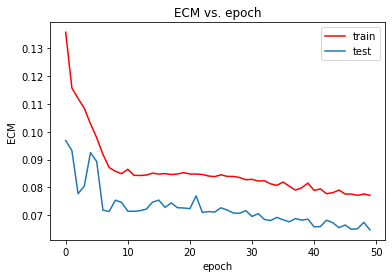

In [7]:
# MIRAMOS LA EVOLUCION DEL ERROR CON EL ECM
plt.plot(history.history['loss'], color = 'r', label = 'train')
plt.plot(history.history['val_loss'],label = 'test')
plt.xlabel('epoch')
plt.ylabel('ECM')
plt.title('ECM vs. epoch')
plt.legend()

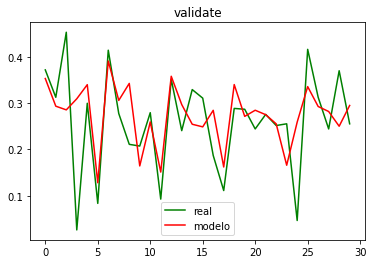

In [8]:
#HACEMOS UN MODELO (CON PERCEPTRON) VS DATA REAL TEST

results = modelo.predict(x_test)
plt.plot(range(len(y_test)), y_test,c='g',label = 'real')
plt.plot(range(len(results)), results,c='r',label = 'modelo')
plt.title('validate')
plt.legend(loc = 'best')
plt.show()

PRONOSTICO (TENEMOS SOLO EL VALOR FUTURO)

In [9]:
# DATOS BASE PARA EL MODELO
ultimos16dias = df[-15:]

# ESCALAMIENTO
ultimos16dias = pd.DataFrame(escalar.fit_transform(ultimos16dias))
ultimos16dias.columns = ['unidades']

# VALORES FUTUROS PARA LOS ULTIMOS 16 DIAS
for i in range(0,len(valoresFuturos)):
  ultimos16dias[valoresFuturos[i]] = ultimos16dias['unidades'].shift(-(i+1))

# ELIMINAMOS VALORES NA
ultimos16dias = ultimos16dias.dropna()

# QUITAMOS LA ULTIMA COLUMNA VF7(TARGET) PORQUE LA VAMOS A PREDECIR
ld_train = ultimos16dias.iloc[:,:-1]

# SELECCIONAMOS LA ULTIMA FILA
x_test = ld_train.iloc[-1,:].values

# LO CONVERTIMOS EN UNA MATRIZ DE 1x7
x_test = x_test.reshape([1,x_test.shape[0]])

# CREAMOS FUNCION PARA PREDECIR n DIAS CON LA MATRIZ x_test
# Y GUARDAR EN UNA SECUENCIA RES SUS VALORES DE PREDICCION 


In [10]:
x_test[0]

array([0.555, 0.565, 0.   , 1.   , 0.72 , 0.535, 0.875])

In [11]:
# n_dias : cantidad de dias a predecir

res = []
def Predecir(n_dias, x_test): # VOID
  prediccion = modelo.predict(x_test)[0]

  if (n_dias != 0):  
    # GUARDA PREDICCIÓN EN RES
    res.append(prediccion)

    # ROTA EN -1 LA MATRIZ x_test
    x_test = np.roll(x_test,-1)

    # ULTIMO ELEMENTO DE x_test AHORA ES LA PREDICCION
    x_test[0][-1] = prediccion[0] 

    # HAGO LO MISMO CON LOS DIAS QUE FALTAN PREDECIR  
    Predecir(n_dias - 1, x_test)

In [12]:
# con la función llenamos la lista res que inicialmente estaba vacia
# PREDECIMOS 7 DIAS
Predecir(7,x_test)
res

[array([0.5437482], dtype=float32),
 array([0.15477231], dtype=float32),
 array([0.79404676], dtype=float32),
 array([0.5446878], dtype=float32),
 array([0.47290838], dtype=float32),
 array([0.47675508], dtype=float32),
 array([0.51011133], dtype=float32)]

Utilizamos la función creada

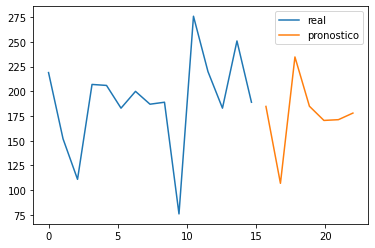

In [13]:

# INVERTIMOS EL ESCALAMIENTO PARA OBTENER LOS VALORES ORIGINALES
valoresOriginales = escalar.inverse_transform(res)

# LO CONVIERTO EN DATA FRAME PARA HACER EL PLOTEO DEL PRONOSTICO
prediccion1semanadediciembre = pd.DataFrame(valoresOriginales)
prediccion1semanadediciembre.columns = ['pronostico']

# CONCATENO CON LOS ULTIMOS 15 DIAS
total = pd.concat([df[-15:], prediccion1semanadediciembre], axis = 0)

# PLOTEO
plt.plot(np.linspace(0,len(total),len(total)), total.unidades, label = 'real')
plt.plot(np.linspace(0,len(total), len(total)), total.pronostico, label = 'pronostico')
plt.legend(loc = 'best')